In [1]:
# 准备必要的包
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils   #第一部分，初始化

%matplotlib inline

训练集X的维度: (2, 300)
训练集Y的维度: (1, 300)
测试集X的维度: (2, 300)
测试集Y的维度: (1, 300)


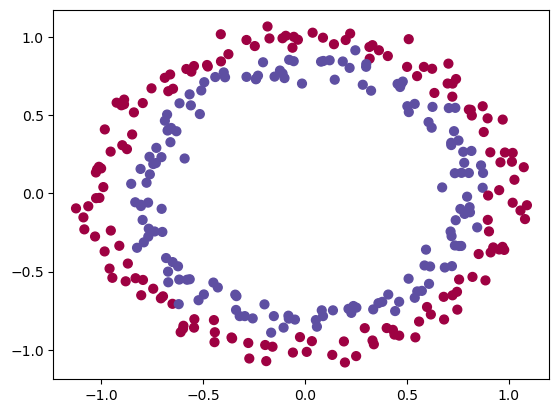

In [2]:
# 加载数据集
train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot=True)
print("训练集X的维度:",train_X.shape)   # 2*300   记录数据点位置
print("训练集Y的维度:",train_Y.shape)   # 1*300   标记数据点类型：红色0，蓝色1
print("测试集X的维度:",train_X.shape)   # 2*300   记录数据点位置
print("测试集Y的维度:",train_Y.shape)   # 1*300   标记数据点类型：红色0，蓝色1

In [3]:
# 随机初始化
def initialize_parameters_random(layers_dims):
    parameters = {}
    L = len(layers_dims)            # 层数
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10 #使用10倍缩放
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))
        
    return parameters

In [4]:
# 抑梯度异常初始化
def initialize_parameters_he(layers_dims):
    parameters = {}
    L = len(layers_dims)            # 层数
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))
        
    return parameters

In [5]:
# 构建模型
def model(X,Y,learning_rate=0.01,num_iterations=15000,print_cost=True,initialization="he",is_polt=True):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    
    #选择初始化参数的类型
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    else : 
        print("错误的初始化参数！程序退出")
        exit
    
    #开始学习
    for i in range(0,num_iterations):
        #前向传播
        a3 , cache = init_utils.forward_propagation(X,parameters)
        
        #计算成本        
        cost = init_utils.compute_loss(a3,Y)
        
        #反向传播
        grads = init_utils.backward_propagation(X,Y,cache)
        
        #更新参数
        parameters = init_utils.update_parameters(parameters,grads,learning_rate)
        
        #记录成本
        if i % 1000 == 0:
            costs.append(cost)
            #打印成本
            if print_cost:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))
        
    
    #学习完毕，绘制成本曲线
    if is_polt:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    #返回学习完毕后的参数
    return parameters

C:\Users\LiuTianyi\Desktop\编程作业4：初始化和正则化\init_utils.py:19: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
C:\Users\LiuTianyi\Desktop\编程作业4：初始化和正则化\init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\LiuTianyi\Desktop\编程作业4：初始化和正则化\init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第0次迭代，成本值为：inf
第1000次迭代，成本值为：0.3863449192494513
第2000次迭代，成本值为：0.27629090639534454
第3000次迭代，成本值为：0.26751440707026763
第4000次迭代，成本值为：0.2614220422020479
第5000次迭代，成本值为：0.25427340982873636
第6000次迭代，成本值为：0.24901472188490745
第7000次迭代，成本值为：0.2658735707851333
第8000次迭代，成本值为：0.2205788114739537
第9000次迭代，成本值为：0.21728239266434468
第10000次迭代，成本值为：0.2148612029065148
第11000次迭代，成本值为：0.21276997156081257
第12000次迭代，成本值为：0.21091790292911347
第13000次迭代，成本值为：0.20929929205259093
第14000次迭代，成本值为：0.2078790856429212


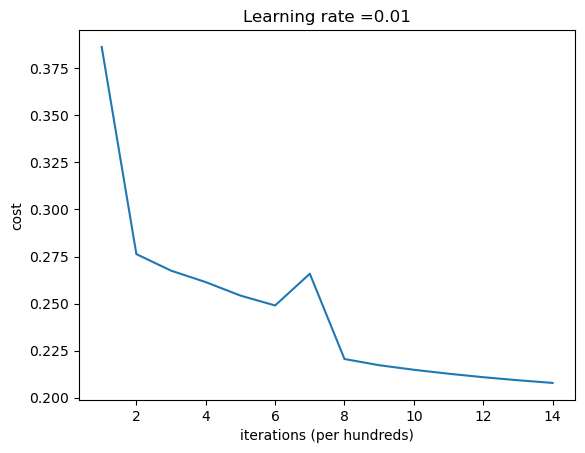

训练集：
Accuracy: 0.8833333333333333
测试集：
Accuracy: 0.85
[[1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0
  0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0
  0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1
  1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1
  1 1 0 1 0 0 0 1 1 1 1 0]]
[[1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0]]


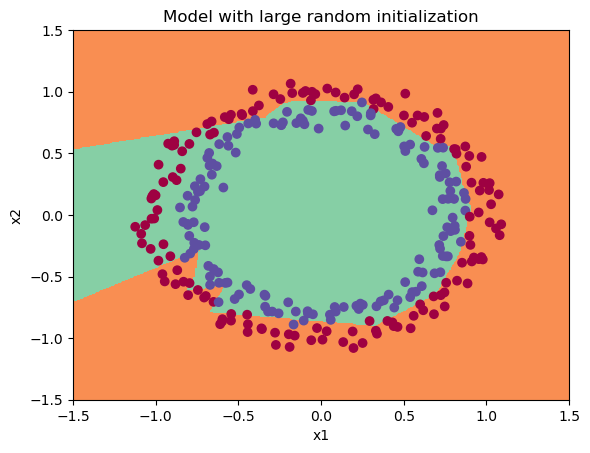

In [6]:
# 调用
parameters = model(train_X, train_Y, initialization = "random",is_polt=True)
print("训练集：")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

print(predictions_train)
print(predictions_test)

plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)

第0次迭代，成本值为：0.7351969069284359
第1000次迭代，成本值为：0.6823778457312657
第2000次迭代，成本值为：0.6685597786807579
第3000次迭代，成本值为：0.6573756333002869
第4000次迭代，成本值为：0.6416076089401115
第5000次迭代，成本值为：0.6183813714012639
第6000次迭代，成本值为：0.5863474772569651
第7000次迭代，成本值为：0.5396701382844274
第8000次迭代，成本值为：0.4858654238144289
第9000次迭代，成本值为：0.39300837476872996
第10000次迭代，成本值为：0.2883221325940632
第11000次迭代，成本值为：0.2122780137954852
第12000次迭代，成本值为：0.16123979012669035
第13000次迭代，成本值为：0.12698630651894816
第14000次迭代，成本值为：0.1039130020318636


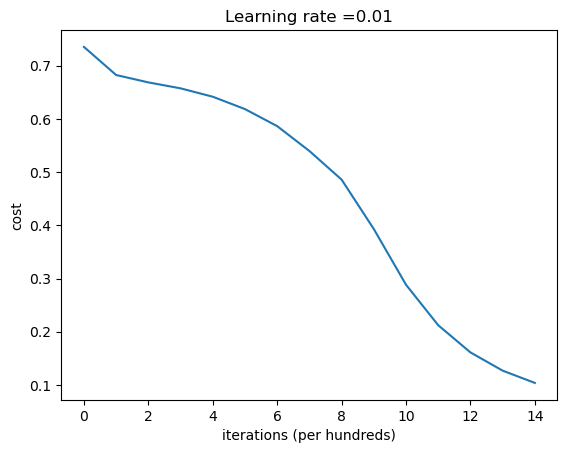

训练集：
Accuracy: 0.99
测试集：
Accuracy: 0.94
[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


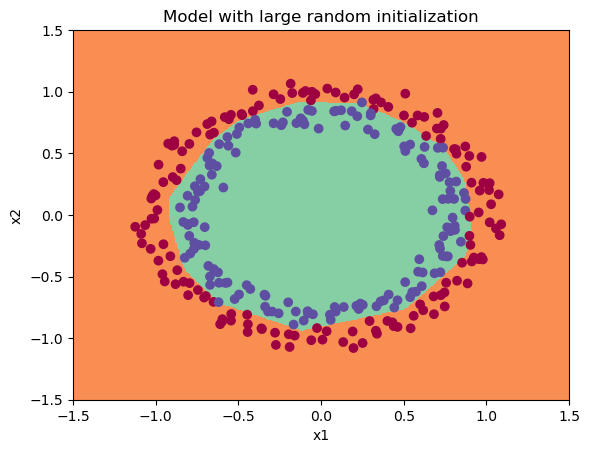

In [7]:
# 调用
parameters = model(train_X, train_Y, initialization = "he",is_polt=True)
print("训练集：")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

print(predictions_train)
print(predictions_test)

plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)